In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"#让所有不是在最后一行的单个变量也能print
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [3]:
from pycaret.classification import *
exp1 = setup(diabetes, target = 'Class variable')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6686
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.782300,0.000000,0.594700,0.735400,0.648100,0.495800
1,Linear Discriminant Analysis,0.778500,0.822800,0.594700,0.727400,0.644500,0.488700
2,Ada Boost Classifier,0.767300,0.816000,0.621100,0.682200,0.646000,0.474500
3,Gradient Boosting Classifier,0.763600,0.837200,0.599400,0.687300,0.634500,0.462400
4,Extreme Gradient Boosting,0.761800,0.835200,0.583900,0.682500,0.622100,0.452300
5,Logistic Regression,0.761700,0.815000,0.557000,0.705100,0.614200,0.447400
6,CatBoost Classifier,0.756100,0.831300,0.583600,0.675100,0.620700,0.443900
7,Light Gradient Boosting Machine,0.750600,0.811100,0.605300,0.653100,0.621500,0.437800
8,Random Forest Classifier,0.743200,0.785400,0.493300,0.693400,0.570700,0.395600
9,Extra Trees Classifier,0.730100,0.794700,0.465500,0.665300,0.543600,0.361300


In [24]:
compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.782300,0.000000,0.594700,0.735400,0.648100,0.495800
1,Ada Boost Classifier,0.767300,0.816000,0.621100,0.682200,0.646000,0.474500
2,Linear Discriminant Analysis,0.778500,0.822800,0.594700,0.727400,0.644500,0.488700
3,Gradient Boosting Classifier,0.763600,0.837200,0.599400,0.687300,0.634500,0.462400
4,Extreme Gradient Boosting,0.761800,0.835200,0.583900,0.682500,0.622100,0.452300
5,Light Gradient Boosting Machine,0.750600,0.811100,0.605300,0.653100,0.621500,0.437800
6,CatBoost Classifier,0.756100,0.831300,0.583600,0.675100,0.620700,0.443900
7,Logistic Regression,0.761700,0.815000,0.557000,0.705100,0.614200,0.447400
8,Decision Tree Classifier,0.720600,0.695100,0.610200,0.614000,0.601000,0.388700
9,Random Forest Classifier,0.743200,0.785400,0.493300,0.693400,0.570700,0.395600


In [31]:
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7593,0.8000,0.7895,0.6250,0.6977,0.5021
1,0.7407,0.8241,0.5263,0.6667,0.5882,0.4028
2,0.7593,0.7188,0.5263,0.7143,0.6061,0.4384
3,0.6667,0.6466,0.4211,0.5333,0.4706,0.2322
4,0.8333,0.8917,0.7368,0.7778,0.7568,0.6301
5,0.7963,0.8436,0.6316,0.7500,0.6857,0.5367
6,0.7778,0.8752,0.5789,0.7333,0.6471,0.4882
7,0.6981,0.8476,0.5000,0.5625,0.5294,0.3083
8,0.8113,0.8714,0.7222,0.7222,0.7222,0.5794
9,0.8302,0.8413,0.7778,0.7368,0.7568,0.6265


In [33]:
tuned_adaboost = tune_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7222,0.7940,0.5263,0.6250,0.5714,0.3682
1,0.7407,0.8489,0.4737,0.6923,0.5625,0.3874
2,0.7222,0.7226,0.3684,0.7000,0.4828,0.3170
3,0.7222,0.7722,0.3684,0.7000,0.4828,0.3170
4,0.7963,0.9218,0.6842,0.7222,0.7027,0.5479
5,0.7778,0.8444,0.5263,0.7692,0.6250,0.4749
6,0.8333,0.9105,0.5789,0.9167,0.7097,0.6010
7,0.7925,0.8722,0.5000,0.8182,0.6207,0.4890
8,0.8491,0.8976,0.7222,0.8125,0.7647,0.6542
9,0.8491,0.8746,0.6667,0.8571,0.7500,0.6443


In [32]:
adaboost.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:

# creating a decision tree model
dt = create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6296,0.6421,0.6842,0.4815,0.5652,0.2593
1,0.6852,0.6368,0.4737,0.5625,0.5143,0.2839
2,0.7037,0.6872,0.6316,0.5714,0.6000,0.3656
3,0.7037,0.6511,0.4737,0.6000,0.5294,0.3175
4,0.7963,0.8068,0.8421,0.6667,0.7442,0.5787
5,0.8333,0.7752,0.5789,0.9167,0.7097,0.6010
6,0.7222,0.6654,0.4737,0.6429,0.5455,0.3520
7,0.7170,0.6778,0.5556,0.5882,0.5714,0.3604
8,0.6981,0.6770,0.6111,0.5500,0.5789,0.3447
9,0.7170,0.7317,0.7778,0.5600,0.6512,0.4235


In [36]:
# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6852,0.6759,0.5789,0.5500,0.5641,0.3180
1,0.7222,0.7827,0.4737,0.6429,0.5455,0.3520
2,0.7778,0.6955,0.4737,0.8182,0.6000,0.4609
3,0.6667,0.6556,0.4211,0.5333,0.4706,0.2322
4,0.7593,0.8782,0.6316,0.6667,0.6486,0.4658
5,0.6667,0.7850,0.3684,0.5385,0.4375,0.2123
6,0.8148,0.8098,0.5263,0.9091,0.6667,0.5507
7,0.7358,0.8484,0.5000,0.6429,0.5625,0.3775
8,0.8302,0.8833,0.7222,0.7647,0.7429,0.6163
9,0.7358,0.8262,0.5556,0.6250,0.5882,0.3948


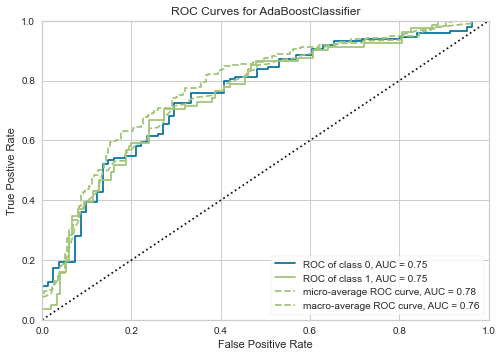

In [41]:

# create a model
adaboost = create_model('ada')
# AUC plot
plot_model(adaboost, plot = 'auc')

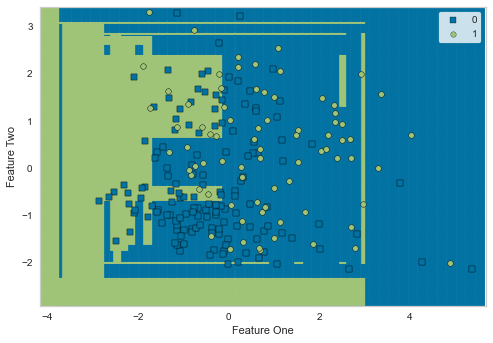

In [42]:
# Decision Boundary
plot_model(adaboost, plot = 'boundary')


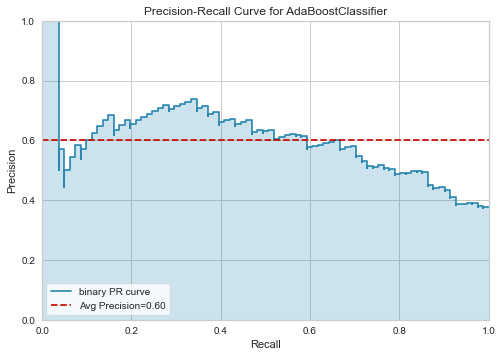

In [43]:
# Precision Recall Curve
plot_model(adaboost, plot = 'pr')


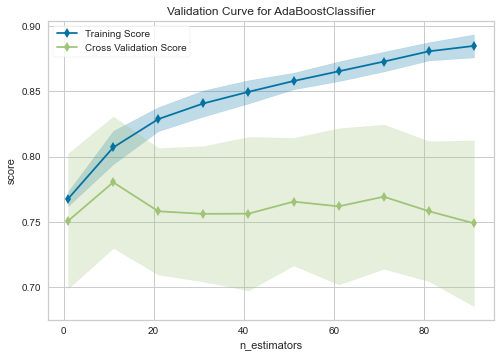

In [44]:
# Validation Curve
plot_model(adaboost, plot = 'vc')

In [1]:

evaluate_model(adaboost)

NameError: name 'evaluate_model' is not defined

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7778,0.7850,0.7368,0.6667,0.7000,0.5242
1,0.7037,0.8406,0.4211,0.6154,0.5000,0.2998
2,0.7593,0.7308,0.5263,0.7143,0.6061,0.4384
3,0.7593,0.7835,0.5789,0.6875,0.6286,0.4524
4,0.7593,0.8932,0.6842,0.6500,0.6667,0.4785
5,0.7222,0.8195,0.4211,0.6667,0.5161,0.3350
6,0.7778,0.9008,0.5263,0.7692,0.6250,0.4749
7,0.6981,0.8365,0.3889,0.5833,0.4667,0.2677
8,0.8491,0.8873,0.8333,0.7500,0.7895,0.6723
9,0.8113,0.8746,0.7222,0.7222,0.7222,0.5794


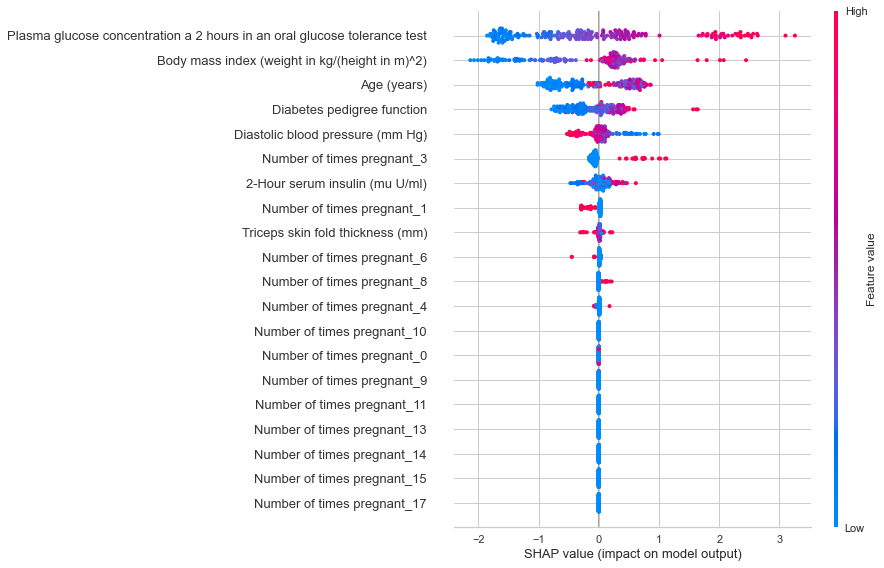

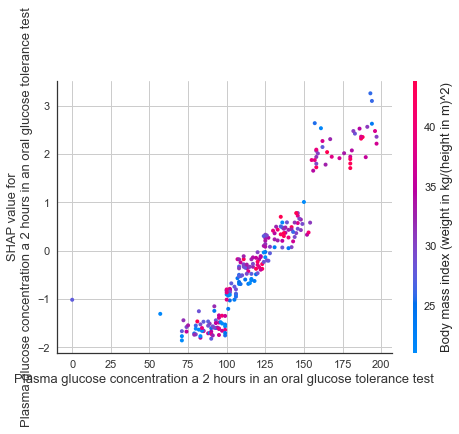

In [45]:

# create a model
xgboost = create_model('xgboost')
# summary plot
interpret_model(xgboost)
# correlation plot
interpret_model(xgboost, plot = 'correlation')

In [46]:

interpret_model(xgboost, plot = 'reason', observation = 0)

In [47]:

# create a model
rf = create_model('rf')
# predict test / hold-out dataset
rf_holdout_pred = predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.7143,0.7665,0.4938,0.6154,0.5479,0.3427


In [48]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=6686,
                       verbose=0, warm_start=False)

In [49]:
predictions = predict_model(rf, data = diabetes)

In [50]:
predictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.8
1,1,85,66,29,0,26.6,0.351,31,0,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,1,0.8
3,1,89,66,23,94,28.1,0.167,21,0,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,1,0.6
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,0.4
764,2,122,70,27,0,36.8,0.340,27,0,0,0.0
765,5,121,72,23,112,26.2,0.245,30,0,0,0.0
766,1,126,60,0,0,30.1,0.349,47,1,1,0.8


In [51]:
#部署模型
deploy_model(model = rf, model_name = 'rf_aws', platform = 'aws',authentication =  {'bucket'  : 'pycaret-test'})

NoCredentialsError: Unable to locate credentials

In [52]:

# creating model
adaboost = create_model('ada')
# saving model
save_model(adaboost, model_name = 'ada_for_deployment')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7593,0.8000,0.7895,0.6250,0.6977,0.5021
1,0.7407,0.8241,0.5263,0.6667,0.5882,0.4028
2,0.7593,0.7188,0.5263,0.7143,0.6061,0.4384
3,0.6667,0.6466,0.4211,0.5333,0.4706,0.2322
4,0.8333,0.8917,0.7368,0.7778,0.7568,0.6301
5,0.7963,0.8436,0.6316,0.7500,0.6857,0.5367
6,0.7778,0.8752,0.5789,0.7333,0.6471,0.4882
7,0.6981,0.8476,0.5000,0.5625,0.5294,0.3083
8,0.8113,0.8714,0.7222,0.7222,0.7222,0.5794
9,0.8302,0.8413,0.7778,0.7368,0.7568,0.6265


Transformation Pipeline and Model Succesfully Saved


In [ ]:
#RidgeRegression岭回归分类 用于施加惩罚系数解决普通最小二乘问题

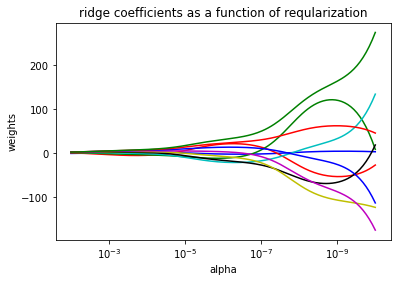

In [29]:
#-*- encoding:utf-8 -*-
"""
岭回归example1
@Dylan
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
 
#x是10*10 的Hilbert 矩阵
x=1./(np.arange(1,11)+np.arange(0,10)[:,np.newaxis])
# print(x)
y=np.ones(10)
 
#####compute path
n_alphas=200
alphas=np.logspace(-10,-2,n_alphas)
# print(alphas)
clf=linear_model.Ridge(fit_intercept=False)
coefs=[]
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(x,y)
    coefs.append(clf.coef_)
 
###展示结果
ax=plt.gca()
# ax.set_color_cycle(['b','r','g','c','k','y','m'])
ax.set_prop_cycle('color',['b','r','g','c','k','y','m'])
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('ridge coefficients as a function of reqularization')
plt.axis('tight')
plt.show()

In [30]:
x

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      